connect to db and retrieve all the tables in

In [8]:
!pwd

/content


In [1]:
%reload_ext sql

In [11]:
%%sql
sqlite:////content/travel.sqlite

In [12]:
%%sql
SELECT * FROM flights limit 5;

 * sqlite:////content/travel.sqlite
   sqlite:////travel.sqlite
Done.


flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [13]:
import sqlite3
import pandas as pd

dat = sqlite3.connect('/content/travel.sqlite')

In [14]:
query = dat.execute("SELECT * From flights")
cols = [column[0] for column in query.description]
flights= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [15]:
query2 = dat.execute("SELECT * From tickets")
tcols = [column[0] for column in query2.description]
tickets = pd.DataFrame.from_records(data = query2.fetchall(), columns = tcols)

In [16]:
query3 = dat.execute("SELECT * From ticket_flights")
cols3 = [column[0] for column in query3.description]
ticket_flights = pd.DataFrame.from_records(data = query3.fetchall(), columns = cols3)

In [17]:
query4 = dat.execute("SELECT * From seats")
cols4 = [column[0] for column in query4.description]
seats = pd.DataFrame.from_records(data = query4.fetchall(), columns = cols4)

In [18]:
query5 = dat.execute("SELECT * From bookings")
cols5 = [column[0] for column in query5.description]
bookings = pd.DataFrame.from_records(data = query5.fetchall(), columns = cols5)

In [19]:
query6 = dat.execute("SELECT * From boarding_passes")
cols6 = [column[0] for column in query6.description]
boarding_passes = pd.DataFrame.from_records(data = query6.fetchall(), columns = cols6)

In [20]:
query7 = dat.execute("SELECT * From airports_data")
cols7 = [column[0] for column in query7.description]
airports_data = pd.DataFrame.from_records(data = query7.fetchall(), columns = cols7)

In [21]:
query8 = dat.execute("SELECT * From aircrafts_data")
cols8 = [column[0] for column in query8.description]
aircrafts_data = pd.DataFrame.from_records(data = query8.fetchall(), columns = cols8)

In [57]:
query9 = dat.execute("SELECT t.ticket_no as ticket_no, t.book_ref as booking_ref, t_f.flight_id as flight_id, f.flight_no as flight_no, f.scheduled_departure as scheduled_departure, f.status as status, f.departure_airport as departure, f.arrival_airport as arrival FROM tickets as t INNER JOIN ticket_flights as t_f ON t_f.ticket_no=t.ticket_no INNER JOIN flights AS f ON t_f.flight_id=f.flight_id;")
cols9 = [column[0] for column in query9.description]
tickets_combined = pd.DataFrame.from_records(data = query9.fetchall(), columns = cols9)

In [ ]:
"""
SELECT t.ticket_no as ticket_no, t.book_ref as booking_ref, t_f.flight_id as flight_id
FROM tickets as t
INNER JOIN ticket_flights as t_f ON t_f.ticket_no=t.ticket_no
INNER JOIN flights AS f ON t_f.flight_id=f.flight_id;
"""

In [23]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [24]:
# top 5 occuring departure airports
top_5_occuring_departure_airports = flights['departure_airport'].value_counts()[:5]
top_5_occuring_departure_airports

DME    3217
SVO    2981
LED    1900
VKO    1719
OVB    1055
Name: departure_airport, dtype: int64

In [25]:
# top 5 occuring arrival airports
top_5_occuring_arrival_airports = flights['arrival_airport'].value_counts()[:5]
top_5_occuring_arrival_airports

DME    3217
SVO    2982
LED    1902
VKO    1717
OVB    1055
Name: arrival_airport, dtype: int64

In [26]:
# top 5 occuring departure-arrival airport pairs
ods = flights['departure_airport'] + "_" + flights['arrival_airport']
ods.value_counts()[:5]

SVO_LED    305
LED_SVO    305
DME_LED    244
LED_DME    244
DME_BZK    183
dtype: int64

In [27]:
# which flight numbers fly to most frequently visited airports?
SVO_LED_flights = flights.loc[(flights['departure_airport'] == 'SVO') & (flights['arrival_airport'] == 'LED')]
SVO_LED_flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
4959,4937,PG0469,2017-09-09 12:35:00+03,2017-09-09 13:25:00+03,SVO,LED,Scheduled,321,\N,\N
4960,4938,PG0471,2017-09-07 18:40:00+03,2017-09-07 19:30:00+03,SVO,LED,Scheduled,321,\N,\N
4961,4939,PG0468,2017-09-03 13:15:00+03,2017-09-03 14:05:00+03,SVO,LED,Scheduled,321,\N,\N
4962,4940,PG0470,2017-09-07 10:20:00+03,2017-09-07 11:10:00+03,SVO,LED,Scheduled,321,\N,\N
4963,4941,PG0469,2017-09-07 12:35:00+03,2017-09-07 13:25:00+03,SVO,LED,Scheduled,321,\N,\N
...,...,...,...,...,...,...,...,...,...,...
5259,5237,PG0471,2017-08-22 18:40:00+03,2017-08-22 19:30:00+03,SVO,LED,Scheduled,321,\N,\N
5260,5238,PG0470,2017-08-22 10:20:00+03,2017-08-22 11:10:00+03,SVO,LED,Scheduled,321,\N,\N
5261,5239,PG0469,2017-08-22 12:35:00+03,2017-08-22 13:25:00+03,SVO,LED,Scheduled,321,\N,\N
5262,5240,PG0468,2017-08-22 13:15:00+03,2017-08-22 14:05:00+03,SVO,LED,Scheduled,321,\N,\N


In [28]:
# these flights visit the most visited od
SVO_LED_flights['flight_no'].value_counts()[:10]

PG0469    61
PG0471    61
PG0468    61
PG0470    61
PG0472    61
Name: flight_no, dtype: int64

In [29]:
tickets_combined.head()

,ticket_no,booking_ref,flight_id,flight_no,scheduled_departure
0,0005432000987,06B046,28935,PG0242,2017-07-16 12:05:00+03
1,0005432000988,06B046,28935,PG0242,2017-07-16 12:05:00+03
2,0005432000989,E170C3,28939,PG0242,2017-07-17 12:05:00+03
3,0005432000990,E170C3,28939,PG0242,2017-07-17 12:05:00+03
4,0005432000991,F313DD,28913,PG0242,2017-07-18 12:05:00+03


In [30]:
# most frequent flight no
df2 = tickets_combined['flight_no']
df2.mode()

0    PG0222
Name: flight_no, dtype: object

In [ ]:
# PG0222 is the most frequent flight

In [31]:
PG0222_flights = flights.loc[flights['flight_no'] == 'PG0222']
PG0222_flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
270,245,PG0222,2017-07-18 11:05:00+03,2017-07-18 14:30:00+03,DME,OVB,Arrived,773,2017-07-18 11:06:00+03,2017-07-18 14:32:00+03
271,246,PG0222,2017-09-05 11:05:00+03,2017-09-05 14:30:00+03,DME,OVB,Scheduled,773,\N,\N
272,247,PG0222,2017-08-07 11:05:00+03,2017-08-07 14:30:00+03,DME,OVB,Arrived,773,2017-08-07 11:09:00+03,2017-08-07 14:35:00+03
273,248,PG0222,2017-09-08 11:05:00+03,2017-09-08 14:30:00+03,DME,OVB,Scheduled,773,\N,\N
274,249,PG0222,2017-08-13 11:05:00+03,2017-08-13 14:30:00+03,DME,OVB,Arrived,773,2017-08-13 11:06:00+03,2017-08-13 14:32:00+03
...,...,...,...,...,...,...,...,...,...,...
326,301,PG0222,2017-08-09 11:05:00+03,2017-08-09 14:30:00+03,DME,OVB,Arrived,773,2017-08-09 11:08:00+03,2017-08-09 14:31:00+03
327,302,PG0222,2017-07-27 11:05:00+03,2017-07-27 14:30:00+03,DME,OVB,Arrived,773,2017-07-27 11:07:00+03,2017-07-27 14:34:00+03
328,303,PG0222,2017-09-01 11:05:00+03,2017-09-01 14:30:00+03,DME,OVB,Scheduled,773,\N,\N
329,304,PG0222,2017-08-16 11:05:00+03,2017-08-16 14:30:00+03,DME,OVB,On Time,773,\N,\N


In [32]:
status_counts= flights['status'].value_counts()
status_counts

Arrived      16707
Scheduled    15383
On Time        518
Cancelled      414
Departed        58
Delayed         41
Name: status, dtype: int64

<Axes: >

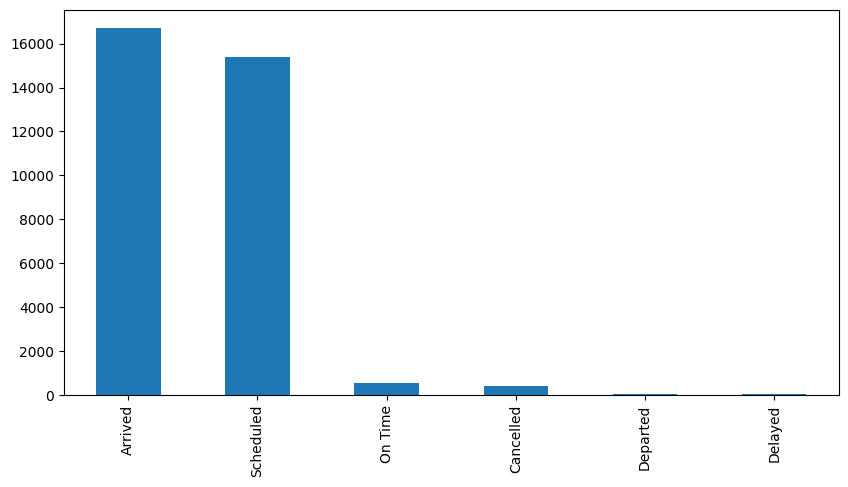

In [33]:
status_counts.plot.bar(figsize=(10, 5))

In [36]:
# filter out the scheduled and On Time status
arrived_flights = flights.loc[flights['status'] == 'Arrived']
arrived_flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
26,1,PG0405,2017-07-16 09:35:00+03,2017-07-16 10:30:00+03,DME,LED,Arrived,321,2017-07-16 09:44:00+03,2017-07-16 10:39:00+03
27,2,PG0404,2017-08-05 19:05:00+03,2017-08-05 20:00:00+03,DME,LED,Arrived,321,2017-08-05 19:06:00+03,2017-08-05 20:01:00+03
28,3,PG0405,2017-08-05 09:35:00+03,2017-08-05 10:30:00+03,DME,LED,Arrived,321,2017-08-05 09:39:00+03,2017-08-05 10:34:00+03
39,14,PG0402,2017-08-06 12:25:00+03,2017-08-06 13:20:00+03,DME,LED,Arrived,321,2017-08-06 12:28:00+03,2017-08-06 13:23:00+03
40,15,PG0402,2017-07-28 12:25:00+03,2017-07-28 13:20:00+03,DME,LED,Arrived,321,2017-07-28 12:31:00+03,2017-07-28 13:26:00+03
...,...,...,...,...,...,...,...,...,...,...
33113,33114,PG0063,2017-07-17 19:25:00+03,2017-07-17 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-17 19:32:00+03,2017-07-17 20:17:00+03
33114,33115,PG0063,2017-08-08 19:25:00+03,2017-08-08 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-08 19:27:00+03,2017-08-08 20:12:00+03
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03


In [58]:
tickets_combined_PG0222 = tickets_combined.loc[(tickets_combined['status'] == 'Arrived') & (tickets_combined['flight_no'] == 'PG0222') ]
tickets_combined_PG0222

,ticket_no,booking_ref,flight_id,flight_no,scheduled_departure,status,departure,arrival
27293,0005432277663,CE2E4D,266,PG0222,2017-07-22 11:05:00+03,Arrived,DME,OVB
27563,0005432277569,5F1987,277,PG0222,2017-07-16 11:05:00+03,Arrived,DME,OVB
27564,0005432277570,5F1987,277,PG0222,2017-07-16 11:05:00+03,Arrived,DME,OVB
27565,0005432277571,B34CC4,277,PG0222,2017-07-16 11:05:00+03,Arrived,DME,OVB
27566,0005432277572,6C26C0,277,PG0222,2017-07-16 11:05:00+03,Arrived,DME,OVB
...,...,...,...,...,...,...,...,...
825515,0005435142760,1B50CB,281,PG0222,2017-08-15 11:05:00+03,Arrived,DME,OVB
825519,0005435142761,DE3B8D,281,PG0222,2017-08-15 11:05:00+03,Arrived,DME,OVB
825523,0005435142762,DE3B8D,281,PG0222,2017-08-15 11:05:00+03,Arrived,DME,OVB
825527,0005435142763,DE3B8D,281,PG0222,2017-08-15 11:05:00+03,Arrived,DME,OVB


In [42]:
# count number of tickets by scheduled departure
tickets_combined_PG0222['scheduled_departure'].min()

'2017-07-16 11:05:00+03'

In [43]:
tickets_combined_PG0222['scheduled_departure'].max()

'2017-08-15 11:05:00+03'

In [74]:
# since departure is the same for all values, it can be dropped as a column
tickets_combined_PG0222["departure"].unique()

array(['DME'], dtype=object)

In [75]:
# since arrival is the same for all values, it can be dropped as a column
tickets_combined_PG0222["arrival"].unique()

array(['OVB'], dtype=object)

In [91]:
grouped=tickets_combined_PG0222.groupby(["scheduled_departure"],as_index=False).count()

In [92]:
g2 = grouped.drop(columns = ["booking_ref", "flight_id", "flight_no", "status", "departure", "arrival"])

In [95]:
g2['scheduled_departure'] = pd.to_datetime(g2['scheduled_departure']).dt.date

<Axes: >

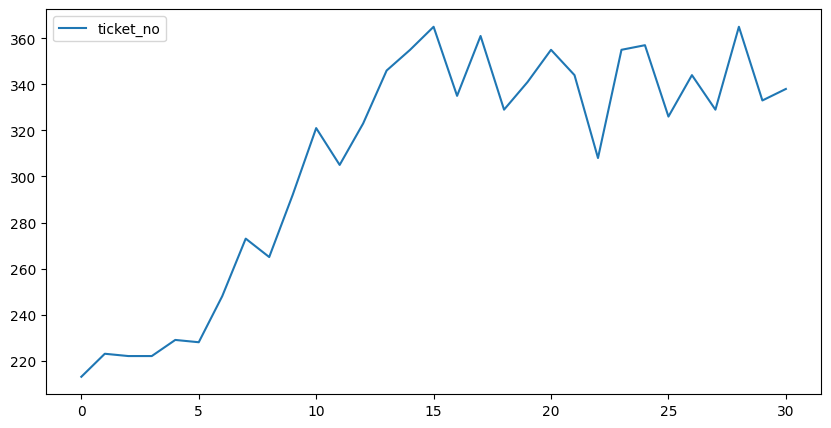

In [97]:
g2.plot(figsize=(10, 5))

In [98]:
tickets_combined_whole = tickets_combined.loc[(tickets_combined['status'] == 'Arrived')]

In [100]:
tickets_combined_whole['scheduled_departure'] = pd.to_datetime(tickets_combined_whole['scheduled_departure']).dt.date

<ipython-input-100-b42b512d45cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickets_combined_whole['scheduled_departure'] = pd.to_datetime(tickets_combined_whole['scheduled_departure']).dt.date


<Axes: >

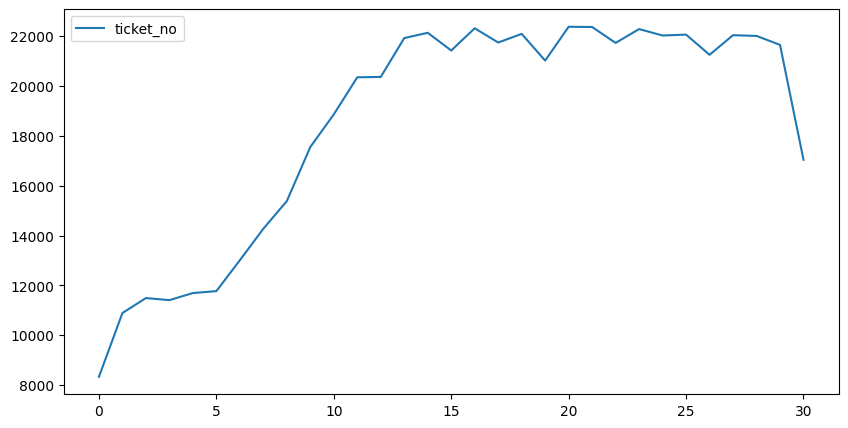

In [102]:
grouped_whole=tickets_combined_whole.groupby(["scheduled_departure"],as_index=False).count()
g3 = grouped_whole.drop(columns = ["booking_ref", "flight_id", "flight_no", "status", "departure", "arrival"])
g3.plot(figsize=(10, 5))

In [103]:
# od heatmap for 1 month
# group by od
grouped_od=tickets_combined_whole.groupby(["departure", "arrival"],as_index=False).count()

In [105]:
g = grouped_od.drop(columns=["booking_ref", "flight_id", "flight_no", "scheduled_departure", "status"])
g

,departure,arrival,ticket_no
0,AAQ,EGO,1961
1,AAQ,SVO,2981
2,ABA,DME,466
3,ABA,OVB,217
4,ABA,TOF,258
...,...,...,...
446,VVO,IKT,214
447,VVO,KHV,2179
448,VVO,VKO,898
449,YKS,LED,352


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns


data = {'departure': g["departure"],
        'arrival': g["arrival"],
        'ticket_count': g["ticket_no"]}

df = pd.DataFrame(data)

<Axes: xlabel='arrival', ylabel='departure'>

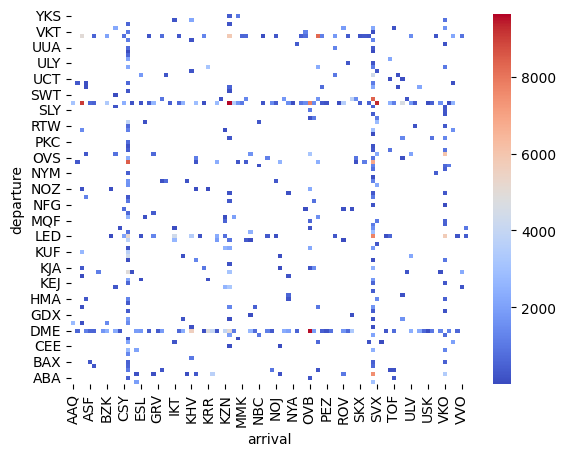

In [112]:
df_pivot = df.pivot_table(index='departure',
                          columns='arrival',
                          values='ticket_count').sort_index(ascending=False)

sns.heatmap(df_pivot, annot=False, cmap='coolwarm')